## Introduction

In [ ]:
#  NAMES                 PERMS
# Saba Hatam-Tabrizi    9822693
# Keshav Khanna         8308843

In [ ]:
import math
from operator import index
from tracemalloc import stop 
import numpy as np 
import matplotlib.pyplot as plt
from math import e, factorial 
from random import random 
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd
from termcolor import colored

cf. Russell 1991 "Estimating the Value of e by Simulation" published in Statistical Computing
The goal of the project is an exercise in Gnedenko 1978; p 194

Quesion 1:
The random variables $U_1, U_1, \ldots, U_n$ are independent and uniformly distributed over $(0,1)$. Let $N$ be a random variable equal to the $k$ for which the sum $S_n = \sum_{i=1}^{n}U_i$ exceeds $1$ for the first time, i.e. $\min\{n \text{ such that } S_n=\sum_{i=1}^{n}U_i>1\}$.
Show that: $$\mathbb{E}[N]=e$$
For that you need to start by finding the probability mass function of $N$. Also give its moment generating function.

In [ ]:
# Question 1
# This calculation is just help us solve question 1
# We know:
# P(N=1) = No of times U1>1
# P(N=2) = No of times U1+U2>1
# P(N=n) = No of times U1+U2+...Un>1
# By law of total probablity we also know that P(N=1)+P(N=2)+P(N=3)...P(N=n)=1
#Let us do some simulations to find our respective probalilities and come up with a function with parameter n for each probability
# We will run about 1000 simulations to start with

In [ ]:
def stopping_time(U): #Defining a function stopping time which helps us to calculate the number of trials it takes to generate sum of uniform random variable greater
#than 1
  sum = 0 
  i = 0
  while (sum < 1):
    sum += U[i]
    i += 1
  return i
stopping_times = []
for i in range(1,10001): # This for-loop is meant run 100000 simulations of the number of trials it takes for the sum of uniform random variables to exceed 1
  U = np.random.uniform(0,1,1000) #This line of code 1000 values randomly uniformly distributed between 0 and 1 
  stopping_times.append(stopping_time(U)) #We append the stopping times of our 10,000 simulations in a list
print(stopping_times)




[5, 2, 4, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 5, 3, 2, 5, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 4, 4, 2, 3, 3, 4, 3, 2, 3, 3, 2, 2, 2, 5, 2, 3, 3, 2, 2, 4, 2, 5, 2, 3, 4, 2, 2, 2, 3, 2, 3, 4, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 4, 3, 5, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 4, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 4, 2, 2, 2, 3, 3, 2, 3, 3, 3, 5, 3, 4, 3, 3, 2, 4, 5, 2, 3, 2, 2, 2, 2, 2, 3, 3, 6, 4, 2, 3, 3, 3, 4, 2, 3, 2, 5, 2, 3, 3, 3, 2, 3, 4, 6, 3, 3, 2, 4, 2, 3, 2, 5, 2, 3, 4, 2, 4, 2, 2, 2, 4, 2, 3, 4, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 5, 2, 2, 3, 2, 3, 2, 5, 4, 3, 2, 3, 2, 3, 2, 2, 4, 3, 2, 2, 4, 2, 2, 3, 3, 2, 4, 2, 4, 2, 3, 4, 3, 2, 3, 2, 2, 3, 4, 4, 2, 2, 5, 2, 2, 2, 2, 4, 2, 2, 3, 3, 3, 4, 2, 4, 2, 3, 2, 3, 2, 4, 4, 3, 2, 3, 3, 4, 4, 2, 4, 5, 5, 3, 3, 2, 2, 2, 2, 5, 2, 2, 2, 3, 5, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 4, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 2, 2, 3, 4, 2, 2, 5, 3, 3, 3, 2, 3, 2, 2, 4, 

In [ ]:
len(stopping_times)

10000

In [ ]:
#This code is just to check unique values for all our 10,000 stopping times 
unique_list = list()
unique_items = 0
for item in stopping_times:
  if item not in unique_list:
    unique_list.append(item)
    unique_items += 1

print(unique_list)

[5, 2, 4, 3, 6, 7, 8]


In [ ]:
# This block of code helps us count number of times for which stopping time value is 1,2,3,4,5,6,7,8,9,10 respectively 
N_1 = stopping_times.count(1)
N_2 = stopping_times.count(2)
N_3 = stopping_times.count(3)
N_4 = stopping_times.count(4)
N_5 = stopping_times.count(5)
N_6 = stopping_times.count(6)
N_7 = stopping_times.count(7)
N_8 = stopping_times.count(8)
N_9 = stopping_times.count(9)
N_10 = stopping_times.count(10)

In [ ]:
# This block of code helps us find probabilities for which the number of stopping time is 1,2,3,4,5,6,7,8,9,10 respectively 
PN_1 = N_1/10000
PN_2 = N_2/10000
PN_3 = N_3/10000
PN_4 = N_4/10000
PN_5 = N_5/10000
PN_6 = N_6/10000
PN_7 = N_7/10000
PN_8 = N_8/10000
PN_9 = N_9/10000
PN_10 = N_10/10000

In [ ]:
list_of_probs = [PN_1,PN_2,PN_3,PN_4,PN_5,PN_6,PN_7,PN_8,PN_9,PN_10]

In [ ]:
# We convert all our respective probabilities in a dataframe
data = {'Prob of 1':PN_1,'Prob of 2':PN_2,'Prob of 3':PN_3,'Prob of 4':PN_4,'Prob of 5':PN_5,'Prob of 6':PN_6,'Prob of 7':PN_7,'Prob of 8':PN_8,'Prob of 9':PN_9
        ,'Prob of 10':PN_10}

probs = list(data.keys())
values = list(data.values())

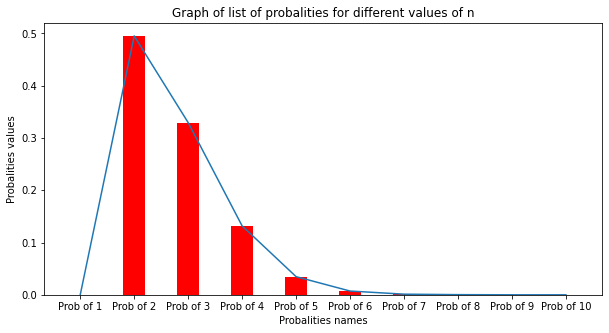

In [ ]:
fig = plt.figure(figsize=(10,5))
# Creating the bar plot 
plt.bar(probs,values,color='red',width=0.4) #For plotting the barplot of probabilities
plt.plot(values) #For plotting the line of probabilities
plt.xlabel('Probalities names') #For setting the x-label
plt.ylabel('Probalities values') #For setting the y-label
plt.title('Graph of list of probalities for different values of n') #For setting the title
plt.show() #To display our graph 

In [ ]:
PN_1+PN_2+PN_3+PN_4+PN_5+PN_6+PN_7+PN_8+PN_9+PN_10 #  Hence total law of proabability is verified. Let us now plot the probabilities

0.9999999999999999

In [ ]:
data

{'Prob of 1': 0.0,
 'Prob of 10': 0.0,
 'Prob of 2': 0.4953,
 'Prob of 3': 0.3295,
 'Prob of 4': 0.1318,
 'Prob of 5': 0.0347,
 'Prob of 6': 0.0072,
 'Prob of 7': 0.0012,
 'Prob of 8': 0.0003,
 'Prob of 9': 0.0}

In [ ]:
#To calculate the expected value of N, we have something like
E_N = (1*PN_1)+(2*PN_2)+(3*PN_3)+(4*PN_4)+(5*PN_5)+(6*PN_6)+(7*PN_7)+(8*PN_8)+(9*PN_9)+(10*PN_10)
print(E_N)
#Hence the expected value of N approaches e

2.7338000000000005


#Image of question 1
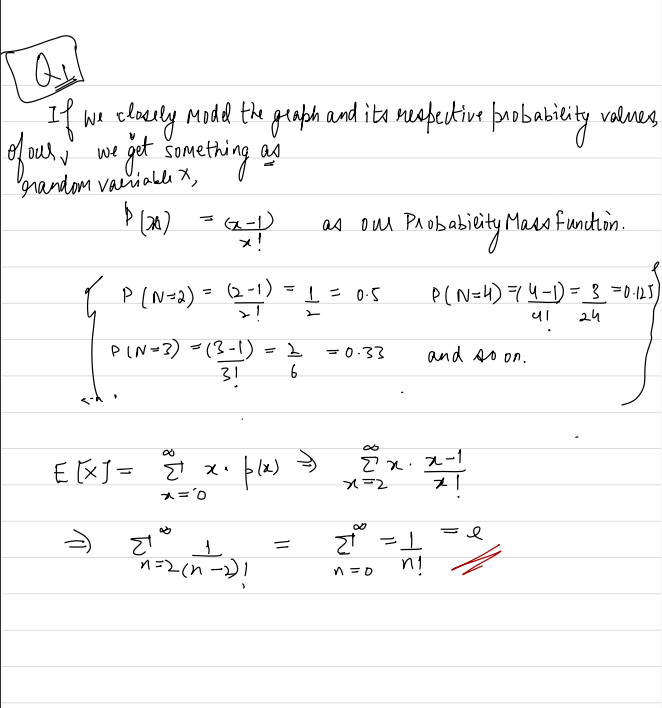


## A Simple Simulation


Question 2:
a) Generate a list of Uniform random variables U
b) Fill the function stopping_time which takes as in input a list of uniform R.Vs and returns the index for which the sum exceeds 1


In [ ]:
# 2A) 
U = list(np.random.uniform(0,1,1000)) # for this project we will have 1,000 observations in our list. 

In [ ]:
# 2B)
def stopping_time(U):
  sum = 0 
  i = 0
  while (sum < 1): 
    sum += U[i] # first value of our list 
    i += 1  # second value of our list 
  return i  # stops when sum >= 1 

In [ ]:
stopping_time(U)

2

Question 3:
a) Estimate the expectation of the random variable N (stopping_time)
b) Estimate its standard deviation
c) Return the confidence interval of your estimator


In [ ]:
def expectation_std_ci(n):
    nested_list = []
    for i in range(0,n):  # perform the random list generator and appending it to empty list n times. 
        x = list(np.random.uniform(0,1,1000)) # generate list of 1,000 random variables uniformly distributed over (0,1)
        nested_list.append(x) #nested_list is list of N simulations of np.random.uniform(0,1,1000)
    result = list(map(stopping_time, nested_list))  #result is a list of the outputs we get from performing stopping time function per each list of nested list
    exp_of_n = np.mean(result)  #expectation of performing stopping_time N times 
    std_of_n = np.std(result) # standard deviation of performing stopping_time N times 
    confidence_interval = norm.interval(0.95, loc = exp_of_n, scale = std_of_n/np.sqrt(n))  # use our estimators to make a 95% CI
    print("\n%s trials gives us the following estimators for the Random variable N (stopping_time):\n" %(n),"\nExpectation = %s (Real e = %s)\n" %(exp_of_n,e), "\nStandard Deviation = ", std_of_n, "\n" "\nThe 95% Confidence interval of our estimators is", confidence_interval, "\n")

In [ ]:
expectation_std_ci(1000)


1000 trials gives us the following estimators for the Random variable N (stopping_time):
 
Expectation = 2.672 (Real e = 2.718281828459045)
 
Standard Deviation =  0.8151171694916014 

The 95% Confidence interval of our estimators is (2.621479442760295, 2.7225205572397053) 



Question 4:
Vary the number of trials and plot the estimator, the true value (np.exp(1)) and the 95% confidence interval around the estimator


In [ ]:
def confidence_interval_function_with_mean(n):
    nested_list = []
    for i in range(0,n):
        x = list(np.random.uniform(0,1,1000))
        nested_list.append(x) #nested_list is list of performing np.random.uniform(0,1,1000) N times
    result = list(map(stopping_time, nested_list)) #result is a list of the outputs we get from stopping time function in each list of the nested list.
    exp_of_n = np.mean(result)  # expectation
    std_of_n = np.std(result) # standard deviation 
    lower_bound = exp_of_n-1.96*std_of_n/math.sqrt(n) # modifying our code from 3, such that we separate CI into lower and upper bound for graphing purposes
    upper_bound = exp_of_n+1.96*std_of_n/math.sqrt(n)
    list_of_mean_ci = [exp_of_n,lower_bound,upper_bound] # next function we call indeces 0,1,&2 for expectation,lowerbound & upperbound,respectively
    return list_of_mean_ci

def varied_trials(start_num,total_simulations): # integers input. start at start_num number of simulations and increase linearly up to total_simulations number of simulations 
  # Each simulation will append to ci_for_n_trials and n_trials until we reach total number of simulations
  ci_for_n_trials = []
  n_trials = [] # our x axis in the graph 
  # ci_for_n_trials will be seperated into the following 3 lists:
  expectations_of_n_trials = [] # since we're using function "confidence_interval_function_with_mean" we call index 0 to get the expectation, 
  upperbound_n_trials = []  # index 1 to get the lower bound,
  lowerbound_n_trials = []  # and index 2 to get the upper bound 
  index = 0 # we will use index+= 1 to get a graph that shows the varied trials linearly 
  while (start_num<=total_simulations): # increase the integer start_num linearly until we reach the integer total_simulations
    n_trials.append(start_num)  # so we can reference number of simulations to its corresponding mean, confidence interval 
    z = confidence_interval_function_with_mean(start_num) # z is our list_of_mean_ci from function "confidence_interval_function_with_mean"
    ci_for_n_trials.append(z) # append z to empty list ci_for_n_trials, which will be a nested list. 
    # We performed the function "confidence_interval_function_with_mean" on Z,
    # so we know what indeces we need to call in ci_for_n_trials to separate them into lists of expectations, lower bounds, upper bounds
    expectations_of_n_trials.append(ci_for_n_trials[index][0])  # index 0 of list_of_mean_ci in previous function is expectation. append to new list.
    lowerbound_n_trials.append(ci_for_n_trials[index][1]) # index 1 of list_of_mean_ci in previous function is lowerbound.  append to new list.
    upperbound_n_trials.append(ci_for_n_trials[index][2]) # index 2 of list_of_mean_ci in previous function is upperbound.  append to new list.
    start_num += 1  # linearly increase our number trials 
    index = index+1 # continue to next index until we reach total number of simulations 
    # make a dataframe of these 4 lists and we will call this dataframe in the next step when we are making a graph 
    df = pd.DataFrame({'No of trials': n_trials, 'Expectation_of_N':expectations_of_n_trials , 'Confidence_Interval_lower_bound': lowerbound_n_trials,'Confidence_Interval_upper_bound':upperbound_n_trials},index=n_trials)
    
   

    
  
  plt.figure(figsize=(10,5))
  plt.title("MC Simulation to estimate e")
  # multiple line plots
  plt.plot('No of trials','Expectation_of_N' , data=df, color='red',label='Expected-value of e')
  plt.plot('No of trials', 'Confidence_Interval_lower_bound', data=df, color='green',label='Lower CI Bound')
  plt.plot('No of trials','Confidence_Interval_upper_bound', data=df, color='blue',label='Upper CI Bound')
  plt.axhline(2.718281, color = 'y', linestyle = '-', label = 'True Value for e') # constant value so we can see expectation and CI relative to true value (e)
  plt.xlabel('Number of Trials')
  plt.ylabel('Approximated Value')

  #show legend
  plt.legend()
  return df,plt.show()  # display the condendsed dataframe beneath our graph. 

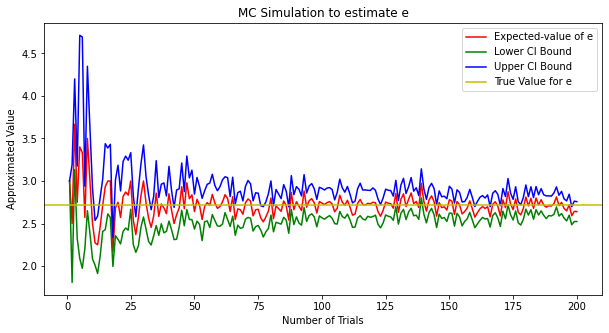

(     No of trials  Expectation_of_N  Confidence_Interval_lower_bound  \
1               1          3.000000                         3.000000   
2               2          2.500000                         1.807035   
3               3          3.666667                         3.133222   
4               4          2.750000                         2.325648   
5               5          3.400000                         2.088117   
..            ...               ...                              ...   
196           196          2.647959                         2.530184   
197           197          2.720812                         2.597488   
198           198          2.590909                         2.485280   
199           199          2.643216                         2.523529   
200           200          2.640000                         2.523187   

     Confidence_Interval_upper_bound  
1                           3.000000  
2                           3.192965  
3                

In [ ]:
print(varied_trials(1,200))

# Variance reduction and Antithetic Variables


Queation 4: From the paper, explain, in your own words what variance reduction is for and what are antithetic variables


  
  We know that variance helps us to find the distribution of data in a population from a mean, and standard deviation gives more clarity about the deviation of data from a mean. So, a model with high variance is less reliable because it implies that the data is widely spread, which will result in significant changes to the projections of the target function.
  
  Thus, variance reduction techniques are used to make as accurate of an estimation as possible with as few samples as possible. Antithetic variables are a method of variance reduction, in which averaging the N values of U and 1-U, will enable us to obtain an un-biased estimator with reduced variance. 


Question 5: Modify your code above to make use of the antithetic variables technique to estimate e (repeat questions 3 and 4)


In [ ]:
# First we define a function, "uniform2", which gives us U2, that is creating a list of U1 values subtracted from 1. 
def uniform2(x):
  u2_list = []
  for i in range(0, len(x)): # U2 is the same length as U1 because same number of elements in the list 
    u2 = 1-x[i] # U2 = 1 - U1 for each index 
    u2_list.append(u2) #append for each index to an empty list 
  return u2_list  # return our new list 

# Then we define a function "new_list_averaged" which returns a list that averages the values in U1 and U2 for every indeces. 
def new_list_averaged(x,y): # input U1 and U2
  new_list_of_n = []
  for i in range(0, len(x)): #  U1 and U2 are same lengths, so it doesn't matter which is x or y 
    new_n = (x[i] +y[i])/2 #  our new N values are the average of the 2 N values for U1 and U2 in its corresponding index 
    new_list_of_n.append(new_n) # get our our new list of averaged N values by appending to empty list 
  return new_list_of_n  # return our new list 

# REPEAT QUESTION 3 WITH ANTITHETIC VARIABLES METHOD
def variance_reduction_question3(n):
    nested_list_u1 = [] # empty list we will append to which will make it our list of N lists of n iid RV's uniformly distributed over 0,1. 
    nested_list_u2 = [] # ^ same thing except we are going to perform uniform2 on U1 and then append. 
    for i in range(0,n):  # using the input of our function, which is number of simulations
        U1 = list(np.random.uniform(0,1,1000)) # generate our list of 1000 random values uniformly distributed between 0 and 1
        U2 = uniform2(U1) # U2 = 1 - U1
        nested_list_u1.append(U1) # nested_list_u1 is list of performing np.random.uniform(0,1,1000) N times
        nested_list_u2.append(U2) # nested_list_u2 is performing uniform2 on U1
    result_U1 = list(map(stopping_time, nested_list_u1)) #  result_U1 is a list of the outputs we get from stopping time function in each list of the nested list.
    result_U2 = list(map(stopping_time, nested_list_u2))  # result_U2 is a list of the outputs we get from stopping time function in each list of the nested list.
    result_u1_u2 = new_list_averaged(result_U1, result_U2)  # result_u1_u2 is our new list that uses antithetic variables method 
    new_std = np.std(result_u1_u2)  # Standard deviation when using antithetic variables method for variance reduction 
    new_expectation = np.mean(result_u1_u2) #  Expectation when using antithetic variables method for variance reduction 
    confidence_interval = norm.interval(0.95, loc = new_expectation, scale = new_std/np.sqrt(n))  # CI when using antithetic variables method for variance reduction 
    print("\nUsing the method of antithetic variables, %s trials gives us the following estimators for the Random variable N (stopping_time):\n" %(n),"\nExpectation = %s (Real e = %s)\n" %(new_expectation,e), "\nStandard Deviation = ", new_std, "\n" "\nThe 95% Confidence interval of our estimators is", confidence_interval, "\n")


In [ ]:
variance_reduction_question3(100)


Using the method of antithetic variables, 100 trials gives us the following estimators for the Random variable N (stopping_time):
 
Expectation = 2.685 (Real e = 2.718281828459045)
 
Standard Deviation =  0.3213642792844282 

The 95% Confidence interval of our estimators is (2.622013758668485, 2.7479862413315153) 



In [ ]:
# REPEAT QUESTION 4 WITH ANTITHETIC VARIABLES METHOD
def variance_reduction_question4(start_num,total_simulations):
  
    nested_list_u1 = [] # list of lists. our sample space of U1 of our number of simulations.
    nested_list_u2 = [] # list of lists. our sample space of U2 our number of simulations.
    # Each simulation will append to these 4 lists until we reach total number of simulations and organize these lists into a single dataframe
    expectations_of_nth_trials = []
    nth_trials = [] # our x axis in the graph 
    upperbound_nth_trials = []
    lowerbound_nth_trials = []
    while(start_num<=total_simulations):  # increase the integer start_num linearly until we reach the integer total_simulations
      for i in range(0,start_num):
        U1 = list(np.random.uniform(0,1,1000))  # generate list of 1,000 RV's uniformly distributed over (0,1)
        U2 = uniform2(U1) # perform Uniform2 on U1 to get U2
        nested_list_u1.append(U1) # nested_list_u1 is list of performing np.random.uniform(0,1,1000) N times
        nested_list_u2.append(U2) # nested_list_u2 are the values in nested_list_u1 subtracted from 1

      result_U1 = list(map(stopping_time, nested_list_u1)) #  result_U1 is a list of the outputs we get from stopping time function in each list of the nested list.
      result_U2 = list(map(stopping_time, nested_list_u2))  # same thing on nested_list_u2
      result_u1_u2 = new_list_averaged(result_U1, result_U2)  # perform function "new_list_averaged" to get our new N values from antithetic variables 
      new_std = np.std(result_u1_u2)  # our new standard deviations. we don't append this to a list because we are not graphing it. only used for our CI formula. 
      new_expectation = np.mean(result_u1_u2) # our new expectations
      expectations_of_nth_trials.append(new_expectation)  # list of our new expectations
      lower_bound = new_expectation-1.96*new_std/math.sqrt(start_num) # implementing our new estimators into lower bound 95% CI formula
      lowerbound_nth_trials.append(lower_bound) # list of our new lower bounds 
      upper_bound = new_expectation+1.96*new_std/math.sqrt(start_num)  # implementing our new estimators into upper bound 95% CI formula
      upperbound_nth_trials.append(upper_bound) # list of our new upper bounds
      nth_trials.append(start_num)  # so we can reference number of simulations to its corresponding mean, confidence interval 

      
      start_num += 1  # linearly increase starting number input until we reach ending number input 
      # organize our 4 lists into a single dataframe. We will call the dataframe to make our plot and display the condendsed dataframe beneath our graph. 
      df = pd.DataFrame({'No of trials': nth_trials, 'Expectation_of_N':expectations_of_nth_trials , 'Confidence_Interval_lower_bound': lowerbound_nth_trials,'Confidence_Interval_upper_bound':upperbound_nth_trials},index=nth_trials)
      # multiple line plots
    plt.figure(figsize=(10,5))
    plt.title("MC Simulation (with antithetic variables technique) to estimate e")
    plt.plot('No of trials','Expectation_of_N' , data=df, color='red',label='Expected-value of e')
    plt.plot('No of trials', 'Confidence_Interval_lower_bound', data=df, color='green',label='Lower CI Bound')
    plt.plot('No of trials','Confidence_Interval_upper_bound', data=df, color='blue',label='Upper CI Bound')
    plt.axhline(2.718281, color = 'y', linestyle = '-', label = 'True Value for e') # constant value so we can see expectation and CI relative to true value (e)
    plt.xlabel('Number of Trials')
    plt.ylabel('Approximated Value')

    #show legend
    plt.legend()
    return df,plt.show()

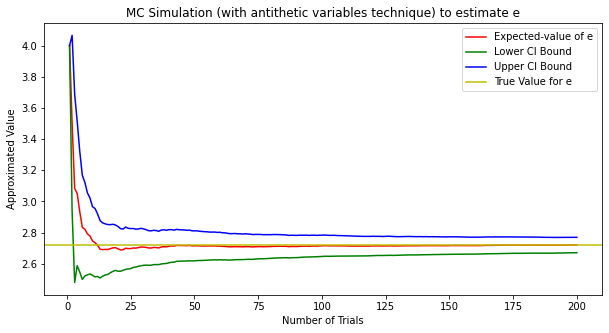

(     No of trials  Expectation_of_N  Confidence_Interval_lower_bound  \
 1               1          4.000000                         4.000000   
 2               2          3.500000                         2.934197   
 3               3          3.083333                         2.479515   
 4               4          3.050000                         2.587735   
 5               5          2.933333                         2.545713   
 ..            ...               ...                              ...   
 196           196          2.719310                         2.669361   
 197           197          2.719505                         2.669665   
 198           198          2.719989                         2.670230   
 199           199          2.719975                         2.670328   
 200           200          2.719776                         2.670287   
 
      Confidence_Interval_upper_bound  
 1                           4.000000  
 2                           4.065803  
 3

In [ ]:
variance_reduction_question4(1,200)